In [193]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/content/My Drive/Data/Rl assignment 4')

In [ ]:
from Bernoulli_arm import *
from Epsilon_greedy import *
from ucb1 import *
from exp3 import *
from exp3_gamma import *
import random
import math
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import pandas as pd

#### Comparing the efficacy of algorithms based on Pseudo regret

In [ ]:
def test_algorithm(algo, arms, num_sims, horizon):
  pseudo_regret=[0.0 for i in range(horizon)]
  chosen_arm_count=[0.0 for i in range(horizon)]
  cumulative_diffs=Counter()
  
  algo.initialize(len(arms))

  for t in range(horizon):
      chosen_arm = algo.select_arm()
      
      reward = arms[chosen_arm].draw()
      #-------------------------------------------- Pseudo Regret -----------------------------------------------#

      # Mean reward of rounds , averaged over  simulations
      mean_rewards=[(sum([arms[arm].draw() for sims in range(num_sims)])/num_sims) for arm in range(len(arms))]
      
      for arm in range(len(arms)):
          cumulative_diffs[arm]+=(mean_rewards[arm]-mean_rewards[chosen_arm])
      
      pseudo_regret[t]=max(cumulative_diffs.values())
      #-----------------------------------------------------------------------------------------------------------#

      #------------------------------------------- Frequency counts ----------------------------------------------#
      
      count=Counter([algo.select_arm() for sims in range(num_sims)])
      for arm in range(len(arms)):
          count[arm]=count[arm]/num_sims
      chosen_arm_count[t]=[count[key] for key in sorted(count.keys())]     

      #-----------------------------------------------------------------------------------------------------------#
      
      algo.update(chosen_arm, reward)

    
  
  return [pseudo_regret,chosen_arm_count]

##### Pseudo regret

In [ ]:
def pseudo_regret(algo, arms, num_sims, horizon):
  cumulative_diffs=Counter()
  algo.initialize(len(arms))

  for t in range(horizon):
      chosen_arm = algo.select_arm()
      
      reward = arms[chosen_arm].draw()

      # Mean reward of rounds , averaged over simulations
      mean_rewards=[(sum([arms[arm].draw() for sims in range(num_sims)])/num_sims) for arm in range(len(arms))]
      
      for arm in range(len(arms)):
          cumulative_diffs[arm]+=(mean_rewards[arm]-mean_rewards[chosen_arm])
      
      algo.update(chosen_arm, reward)
      
  return max(cumulative_diffs.values())

#### Bandits 1

In [ ]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.6]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]

#Epsilon-greedy
algo = EpsilonGreedy(0.3, [], [])
algo.initialize(n_arms)
results_Epsilon = test_algorithm(algo, arms, 1000, 1000)

#ucb1
algo = UCB1([], [])
algo.initialize(n_arms)
results_UCB1 = test_algorithm(algo, arms, 1000, 1000)

#exp3
algo = Exp3([],math.sqrt(2*math.log(5)/5000))
algo.initialize(n_arms)
results_EXP3 = test_algorithm(algo, arms, 1000, 1000)

#gamma_exp3
algo =  Exp3_gamma([],0.05,0,math.sqrt(2*math.log(5)/5000))
algo.initialize(n_arms)
results_EXP3_gamma = test_algorithm(algo, arms, 1000, 1000)
              

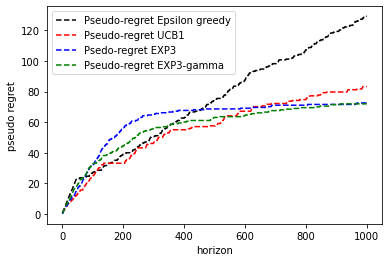

In [218]:
index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('pseudo regret') 
plt.plot(index, results_Epsilon[0], 'k--',label="Pseudo-regret Epsilon greedy")
plt.plot(index, results_UCB1[0], 'r--',label="Pseudo-regret UCB1")
plt.plot(index, results_EXP3[0], 'b--',label="Psedo-regret EXP3")
plt.plot(index, results_EXP3_gamma[0], 'g--',label="Pseudo-regret EXP3-gamma")
plt.legend() 
plt.show()

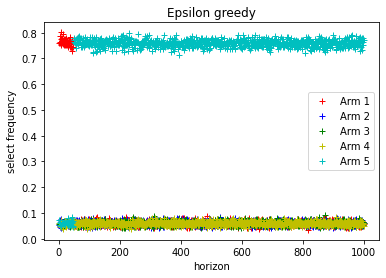

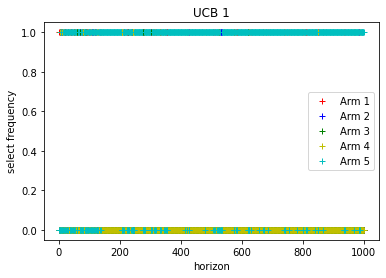

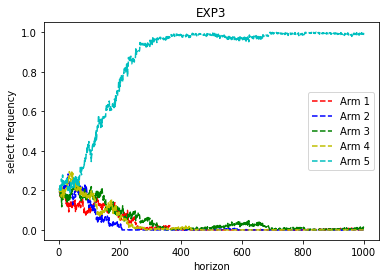

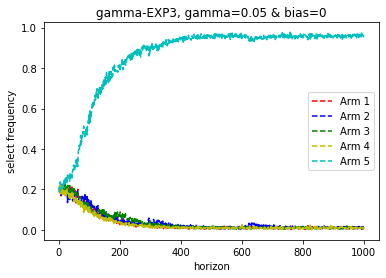

In [219]:
'''Plotting arm frequencies of Epsilon-greedy '''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_Epsilon[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("Epsilon greedy")
plt.plot(index, arms_select_count[0],'+',color='r',label="Arm 1")
plt.plot(index,  arms_select_count[1], '+',color='b',label="Arm 2")
plt.plot(index, arms_select_count[2],'+',color='g',label="Arm 3")
plt.plot(index, arms_select_count[3],'+',color='y',label="Arm 4")
plt.plot(index, arms_select_count[4],'+',color='c',label="Arm 5")
plt.legend() 
plt.show()



'''Plotting arm frequencies of UCB1 '''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_UCB1[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("UCB 1")
plt.plot(index, arms_select_count[0],'+',color='r',label="Arm 1")
plt.plot(index,  arms_select_count[1], '+',color='b',label="Arm 2")
plt.plot(index, arms_select_count[2],'+',color='g',label="Arm 3")
plt.plot(index, arms_select_count[3],'+',color='y',label="Arm 4")
plt.plot(index, arms_select_count[4],'+',color='c',label="Arm 5")
plt.legend() 
plt.show()


'''Plotting arm frequencies of EXP3 '''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_EXP3[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("EXP3")
plt.plot(index, arms_select_count[0], 'r--',label="Arm 1")
plt.plot(index,  arms_select_count[1], 'b--',label="Arm 2")
plt.plot(index, arms_select_count[2], 'g--',label="Arm 3")
plt.plot(index, arms_select_count[3], 'y--',label="Arm 4")
plt.plot(index, arms_select_count[4], 'c--',label="Arm 5")
plt.legend() 
plt.show()



'''Plotting arm frequencies of gamma-EXP3'''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_EXP3_gamma[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("gamma-EXP3, gamma=0.05 & bias=0")
plt.plot(index, arms_select_count[0], 'r--',label="Arm 1")
plt.plot(index,  arms_select_count[1], 'b--',label="Arm 2")
plt.plot(index, arms_select_count[2], 'g--',label="Arm 3")
plt.plot(index, arms_select_count[3], 'y--',label="Arm 4")
plt.plot(index, arms_select_count[4], 'c--',label="Arm 5")
plt.legend() 
plt.show()

##### Bar plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  del sys.path[0]


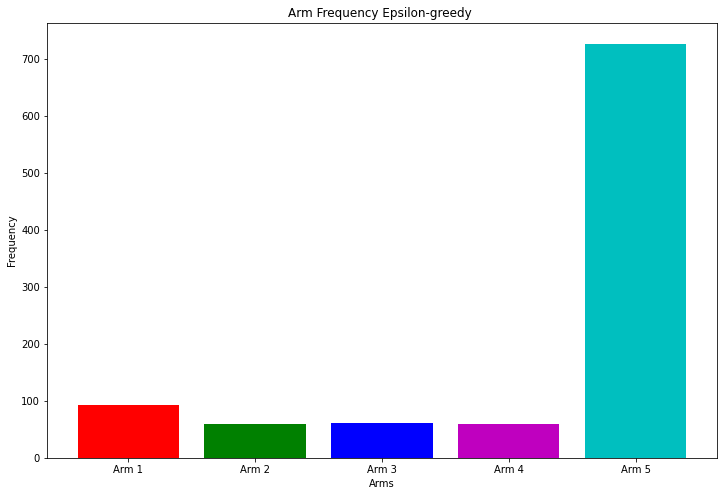

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


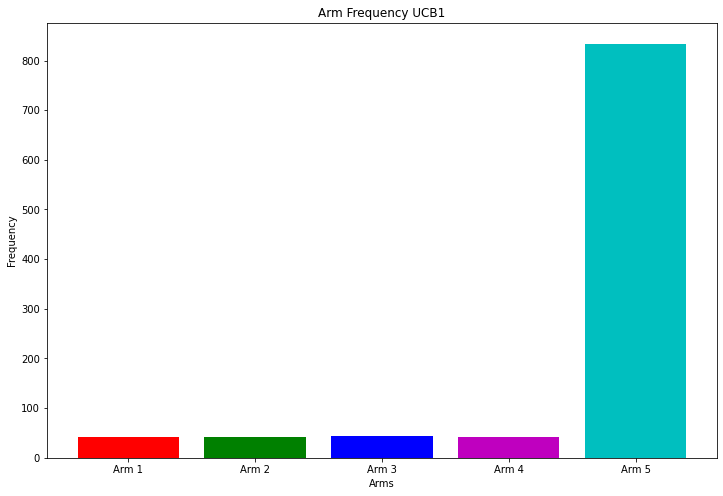

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


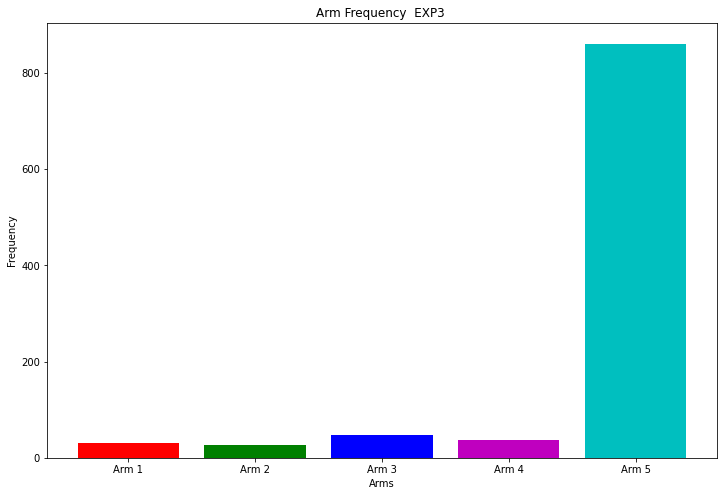

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


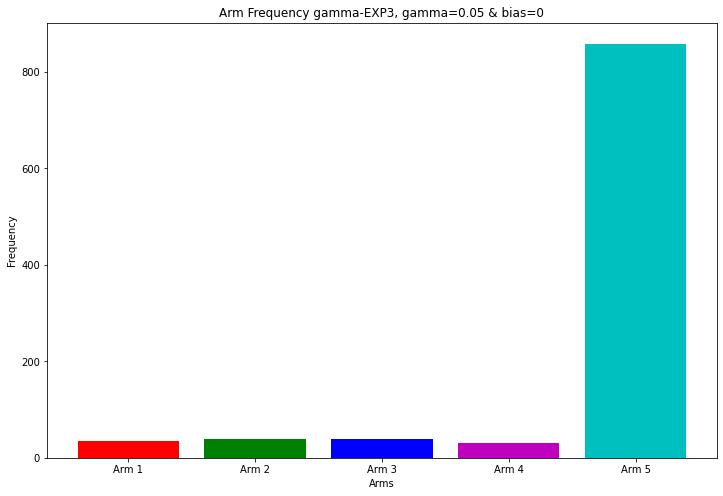

In [220]:
'''Plotting arm frequencies of Epsilon-greedy '''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(len(arms)):
   arms_select_count[arm]=sum([results_Epsilon[1][i][arm] for i in range(1000)])


labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency Epsilon-greedy ')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()




'''Plotting arm frequencies of UCB1 '''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(len(arms)):
   arms_select_count[arm]=sum([results_UCB1[1][i][arm] for i in range(1000)])


labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency UCB1')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()




'''Plotting arm frequencies of EXP3 '''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(5):
   arms_select_count[arm]=sum([results_EXP3[1][i][arm] for i in range(1000)])

labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency  EXP3 ')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()



print("\n")
'''Plotting arm frequencies of gamma-EXP3'''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(5):
   arms_select_count[arm]=sum([results_EXP3_gamma[1][i][arm] for i in range(1000)])


labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency gamma-EXP3, gamma=0.05 & bias=0')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()


#### Bandits 2

In [ ]:
random.seed(1)
means = [0.1, 0.2, 0.5, 0.8, 0.95]
n_arms = len(means)
arms=[ BernoulliArm(mu) for mu in means]

#Epsilon-greedy
algo = EpsilonGreedy(0.3, [], [])
algo.initialize(n_arms)
results_Epsilon = test_algorithm(algo, arms, 1000, 1000)

#ucb1
algo = UCB1([], [])
algo.initialize(n_arms)
results_UCB1 = test_algorithm(algo, arms, 1000, 1000)

#exp3
algo = Exp3([],math.sqrt(2*math.log(5)/5000))
algo.initialize(n_arms)
results_EXP3 = test_algorithm(algo, arms, 1000, 1000)

#gamma_exp3
algo =  Exp3_gamma([],0.05,0,math.sqrt(2*math.log(5)/5000))
algo.initialize(n_arms)
results_EXP3_gamma = test_algorithm(algo, arms, 1000, 1000)
              

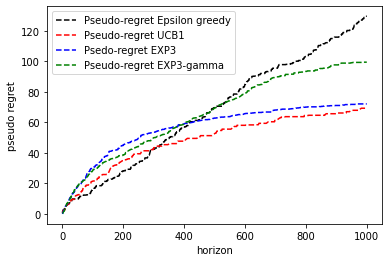

In [222]:
index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('pseudo regret') 
plt.plot(index, results_Epsilon[0], 'k--',label="Pseudo-regret Epsilon greedy")
plt.plot(index, results_UCB1[0], 'r--',label="Pseudo-regret UCB1")
plt.plot(index, results_EXP3[0], 'b--',label="Psedo-regret EXP3")
plt.plot(index, results_EXP3_gamma[0], 'g--',label="Pseudo-regret EXP3-gamma")
plt.legend() 
plt.show()

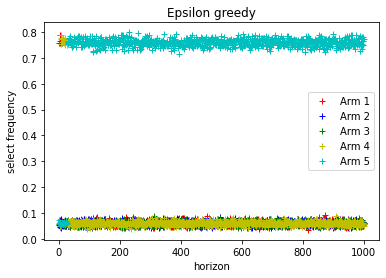

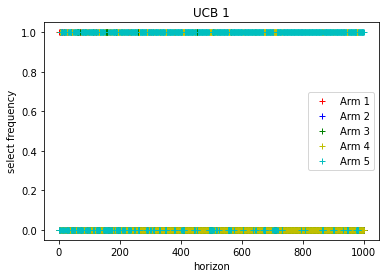

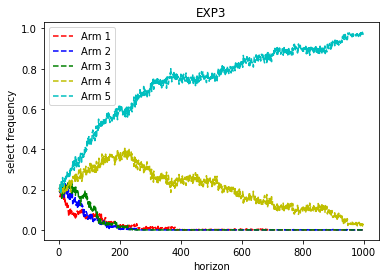

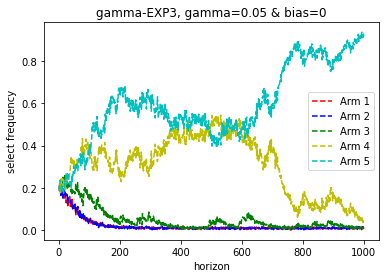

In [223]:
'''Plotting arm frequencies of Epsilon-greedy '''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_Epsilon[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("Epsilon greedy")
plt.plot(index, arms_select_count[0],'+',color='r',label="Arm 1")
plt.plot(index,  arms_select_count[1], '+',color='b',label="Arm 2")
plt.plot(index, arms_select_count[2],'+',color='g',label="Arm 3")
plt.plot(index, arms_select_count[3],'+',color='y',label="Arm 4")
plt.plot(index, arms_select_count[4],'+',color='c',label="Arm 5")
plt.legend() 
plt.show()



'''Plotting arm frequencies of UCB1 '''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_UCB1[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("UCB 1")
plt.plot(index, arms_select_count[0],'+',color='r',label="Arm 1")
plt.plot(index,  arms_select_count[1], '+',color='b',label="Arm 2")
plt.plot(index, arms_select_count[2],'+',color='g',label="Arm 3")
plt.plot(index, arms_select_count[3],'+',color='y',label="Arm 4")
plt.plot(index, arms_select_count[4],'+',color='c',label="Arm 5")
plt.legend() 
plt.show()


'''Plotting arm frequencies of EXP3 '''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_EXP3[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("EXP3")
plt.plot(index, arms_select_count[0], 'r--',label="Arm 1")
plt.plot(index,  arms_select_count[1], 'b--',label="Arm 2")
plt.plot(index, arms_select_count[2], 'g--',label="Arm 3")
plt.plot(index, arms_select_count[3], 'y--',label="Arm 4")
plt.plot(index, arms_select_count[4], 'c--',label="Arm 5")
plt.legend() 
plt.show()



'''Plotting arm frequencies of gamma-EXP3'''
arms_select_count=defaultdict()
for arm in range(5):
   arms_select_count[arm]=[results_EXP3_gamma[1][i][arm] for i in range(1000)] 


index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('select frequency')
plt.title("gamma-EXP3, gamma=0.05 & bias=0")
plt.plot(index, arms_select_count[0], 'r--',label="Arm 1")
plt.plot(index,  arms_select_count[1], 'b--',label="Arm 2")
plt.plot(index, arms_select_count[2], 'g--',label="Arm 3")
plt.plot(index, arms_select_count[3], 'y--',label="Arm 4")
plt.plot(index, arms_select_count[4], 'c--',label="Arm 5")
plt.legend() 
plt.show()

##### Bar plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  del sys.path[0]


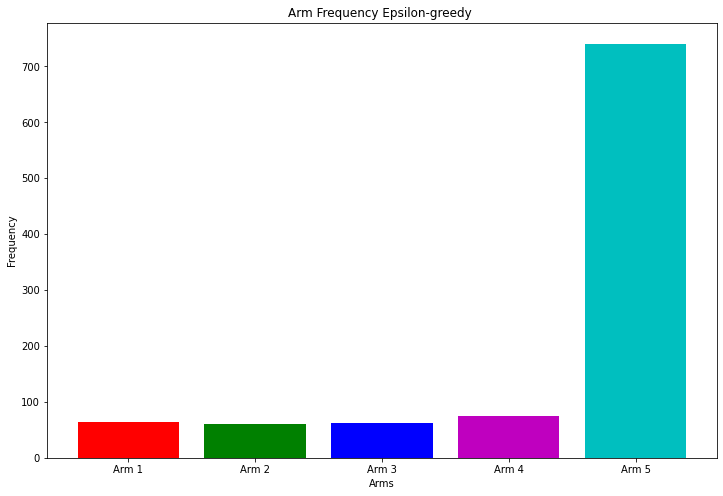

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


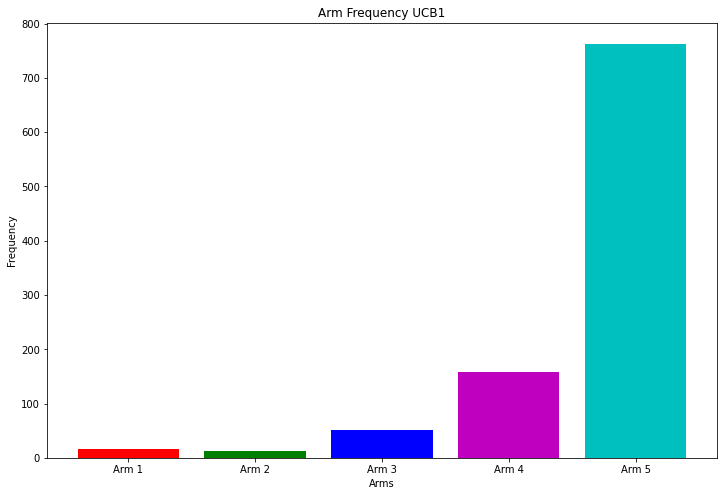

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


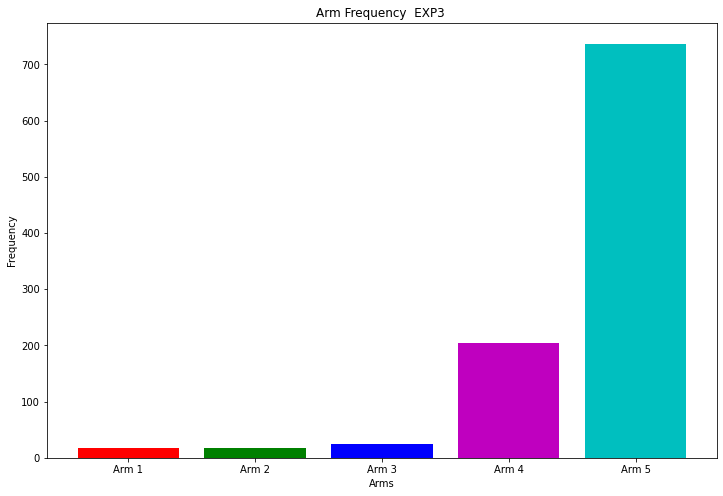

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


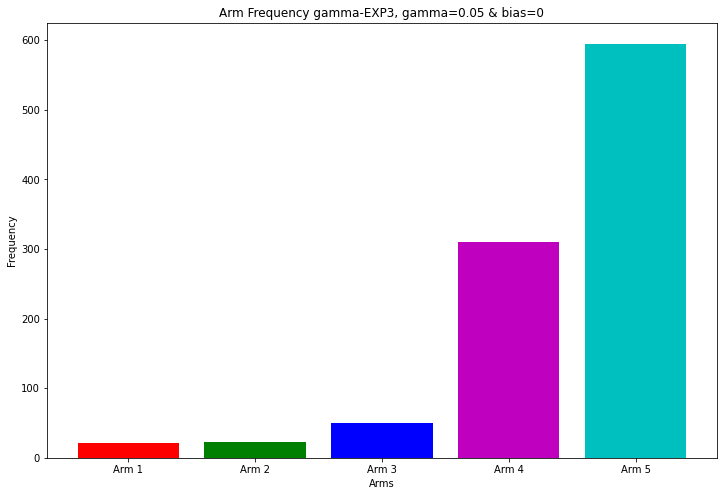

In [224]:
'''Plotting arm frequencies of Epsilon-greedy '''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(len(arms)):
   arms_select_count[arm]=sum([results_Epsilon[1][i][arm] for i in range(1000)])


labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency Epsilon-greedy ')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()




'''Plotting arm frequencies of UCB1 '''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(len(arms)):
   arms_select_count[arm]=sum([results_UCB1[1][i][arm] for i in range(1000)])


labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency UCB1')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()




'''Plotting arm frequencies of EXP3 '''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(5):
   arms_select_count[arm]=sum([results_EXP3[1][i][arm] for i in range(1000)])

labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency  EXP3 ')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()



print("\n")
'''Plotting arm frequencies of gamma-EXP3'''
arms_select_count=[0.0 for arm in range(len(arms))]
for arm in range(5):
   arms_select_count[arm]=sum([results_EXP3_gamma[1][i][arm] for i in range(1000)])


labels=np.array(['Arm 1','Arm 2','Arm 3','Arm 4','Arm 5'])
plt.figure(figsize=(12, 8))
plt.bar(
    labels
    ,pd.Series(arms_select_count),
    align="center",
    color='rgbmc'
)
 
plt.xticks(labels)
plt.title('Arm Frequency gamma-EXP3, gamma=0.05 & bias=0')
plt.xlabel('Arms')
plt.ylabel('Frequency')
plt.show()


##### Expected Regret

In [ ]:
def Expected_regret(algo, arms, num_sims, horizon):  
  max_list=[]
  for sims in range(num_sims):
    cumulative_diffs=defaultdict(float)
    algo.initialize(len(arms))
    for t in range(horizon):
        chosen_arm = algo.select_arm()
        reward = arms[chosen_arm].draw()
        for arm in range(len(arms)):
          if arm!=chosen_arm:
            cumulative_diffs[arm]+=(arms[arm].draw()-reward)# For arm==chosen_arm the difference will be 0

        algo.update(chosen_arm, reward)

    max_list.append(max(cumulative_diffs.values()))

  return sum(max_list)/num_sims

##### Using Expected Regret

In [ ]:
random.seed(1)
means = [0.5,0.55]  
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]

In [ ]:
#ucb1
results_UCB1=[]
for i in range(1,1001):
  algo = UCB1([], [])
  algo.initialize(n_arms)
  results_UCB1.append(Expected_regret(algo, arms, 1000, i))

In [ ]:
#EXP3
results_EXP3=[]
for i in range(1,1001):
  algo =  Exp3([],math.sqrt(2*math.log(2)/(2*i)))
  algo.initialize(n_arms)
  results_EXP3.append(Expected_regret(algo, arms, 1000, i))

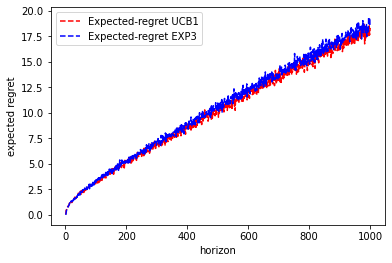

In [52]:
index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('expected regret') 
plt.plot(index, results_UCB1, 'r--',label="Expected-regret UCB1")
plt.plot(index, results_EXP3, 'b--',label="Expected-regret EXP3")
plt.legend() 
plt.show()

##### Using Pseudo regret

In [ ]:
random.seed(1)
means = [0.5,0.55]  
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]

In [ ]:
#ucb1
results_UCB1=[]
for i in range(1,1001):
  algo = UCB1([], [])
  algo.initialize(n_arms)
  results_UCB1.append(pseudo_regret(algo, arms, 1000, i))

#EXP3
results_EXP3=[]
for i in range(1,1001):
  algo =  Exp3([],math.sqrt(2*math.log(2)/(2*i)))
  algo.initialize(n_arms)
  results_EXP3.append(pseudo_regret(algo, arms, 1000, i))

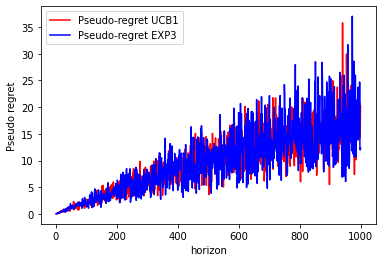

In [179]:
index=np.array(list(range(1,1001)))
plt.xlabel('horizon') 
plt.ylabel('Pseudo regret') 
plt.plot(index, results_UCB1, 'r-',label="Pseudo-regret UCB1")
plt.plot(index, results_EXP3, 'b-',label="Pseudo-regret EXP3")
plt.legend() 
plt.show()

#### Comparing performance for different learning rates on arms=[0.5,0.5+delta]

##### Using Expected regret

In [ ]:
random.seed(1)
means = [0.5,0.55]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_expected_regrets1=defaultdict(float)

#### For n=10000

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_expected_regrets1[learning_rate] =Expected_regret(algo, arms, 100, 10000)


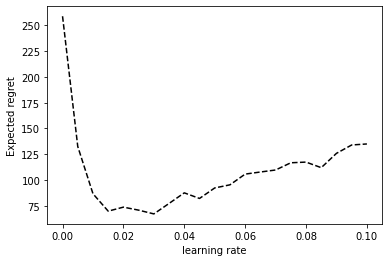

In [160]:
regrets=[EXP3_expected_regrets1[i] for i in EXP3_expected_regrets1.keys()]
learning_rates=sorted(list(EXP3_expected_regrets1.keys()))
plt.xlabel('learning rate') 
plt.ylabel('Expected regret') 
plt.plot(learning_rates, regrets, 'k--')
plt.show()  

#### For n=100000

In [ ]:
random.seed(1)
means = [0.5,0.55]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_expected_regrets2=defaultdict(float)

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_expected_regrets2[learning_rate] =Expected_regret(algo, arms, 100, 100000)

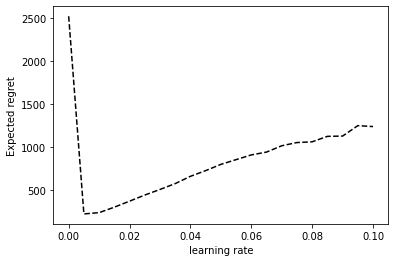

In [25]:
regrets=[EXP3_expected_regrets2[i] for i in EXP3_expected_regrets2.keys()]
learning_rates=sorted(list(EXP3_expected_regrets2.keys()))
plt.xlabel('learning rate') 
plt.ylabel('Expected regret') 
plt.plot(learning_rates, regrets, 'k--')
plt.show()  

In [ ]:
random.seed(1)
means = [0.5,0.6]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_expected_regrets3=defaultdict(float)

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_expected_regrets3[learning_rate] =Expected_regret(algo, arms, 100, 100000)

In [ ]:
random.seed(1)
means = [0.5,0.52]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_expected_regrets4=defaultdict(float)

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_expected_regrets4[learning_rate] =Expected_regret(algo, arms, 100, 100000)

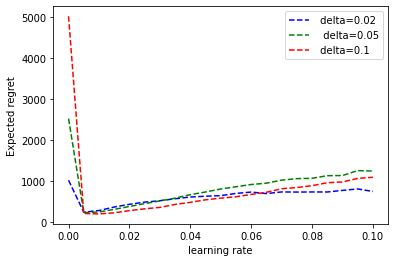

In [23]:
regrets=[EXP3_expected_regrets2[i] for i in EXP3_expected_regrets2.keys()]
regrets1=[EXP3_expected_regrets3[i] for i in EXP3_expected_regrets3.keys()]
regrets2=[EXP3_expected_regrets4[i] for i in EXP3_expected_regrets4.keys()]
learning_rates=sorted(list(EXP3_expected_regrets2.keys()))
plt.xlabel('learning rate') 
plt.ylabel('Expected regret') 
plt.plot(learning_rates, regrets2, 'b--',label=" delta=0.02")
plt.plot(learning_rates, regrets, 'g--',label="  delta=0.05")
plt.plot(learning_rates, regrets1, 'r--',label=" delta=0.1")
plt.legend() 
plt.show()  

##### Using Pseudo regret

In [ ]:
random.seed(1)
means = [0.5,0.55]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_pseudo_regrets1=defaultdict(float)

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_pseudo_regrets1[learning_rate] =pseudo_regret(algo, arms, 1000, 100000)

In [ ]:
random.seed(1)
means = [0.5,0.6]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_pseudo_regrets2=defaultdict(float)

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_pseudo_regrets2[learning_rate] =pseudo_regret(algo, arms, 1000, 100000)

In [ ]:
random.seed(1)
means = [0.5,0.52]
n_arms = len(means)
arms=[BernoulliArm(mu) for mu in means]
EXP3_pseudo_regrets3=defaultdict(float)

In [ ]:
for learning_rate in np.arange(0,0.105,0.005):
  algo = Exp3([],learning_rate)
  algo.initialize(n_arms)
  EXP3_pseudo_regrets3[learning_rate] =pseudo_regret(algo, arms, 1000, 100000)

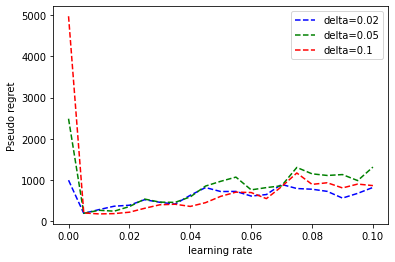

In [170]:
regrets=[EXP3_pseudo_regrets1[i] for i in EXP3_pseudo_regrets1.keys()]
regrets1=[EXP3_pseudo_regrets2[i] for i in  EXP3_pseudo_regrets2.keys()]
regrets2=[EXP3_pseudo_regrets3[i] for i in EXP3_pseudo_regrets3.keys()]
learning_rates=sorted(list(EXP3_pseudo_regrets3.keys()))
plt.xlabel('learning rate') 
plt.ylabel('Pseudo regret') 
plt.plot(learning_rates, regrets2, 'b--',label="delta=0.02")
plt.plot(learning_rates, regrets, 'g--',label="delta=0.05")
plt.plot(learning_rates, regrets1, 'r--',label="delta=0.1")
plt.legend() 
plt.show()  
